In [275]:
%matplotlib inline

In [276]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

<h2>Data Preparation</h2>

In [277]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [278]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<b>Data has been read in OK. Data will need normalising as scales are different for each feature.</b>

In [279]:
# Set a new field quality_label by transforming the existing quality column
data['quality_label'] = data['quality'].apply(lambda value: 'low' if value <= 5 
                                                              else 'medium' if value <= 7 
                                                              else 'high')

In [280]:
# Convert new field to categorical type
data['quality_label'] = pd.Categorical(data['quality_label'], 
                                       categories=['low', 'medium', 'high'])

In [281]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
quality_label           1599 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


<b>Categorical quality label has now been added to the original data set.</b>

<h2>Basic Analysis</h2>

In [282]:
duplicate_count = str(np.sum(np.array(data.duplicated())))
print("Duplicate data count: " + duplicate_count)

Duplicate data count: 240


<b>There are a number of duplicates in the data. Not yet sure if this will be a problem.</b>

In [283]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

<b>We have no null data which is good.</b>

<h2>Base Data Analysis</h2>

In [284]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<b>This confirms that each features has different scales so normalisation may need to be used depending on the model.</b>

<b>Quality is clearly limited in range, between 3 and 8, and there are no observations with quality extremes.</b>

<b>There may also be some large outliers in the sulphur dioxide and residual sugar data points, given the different between 75% quartile and max values.</b>

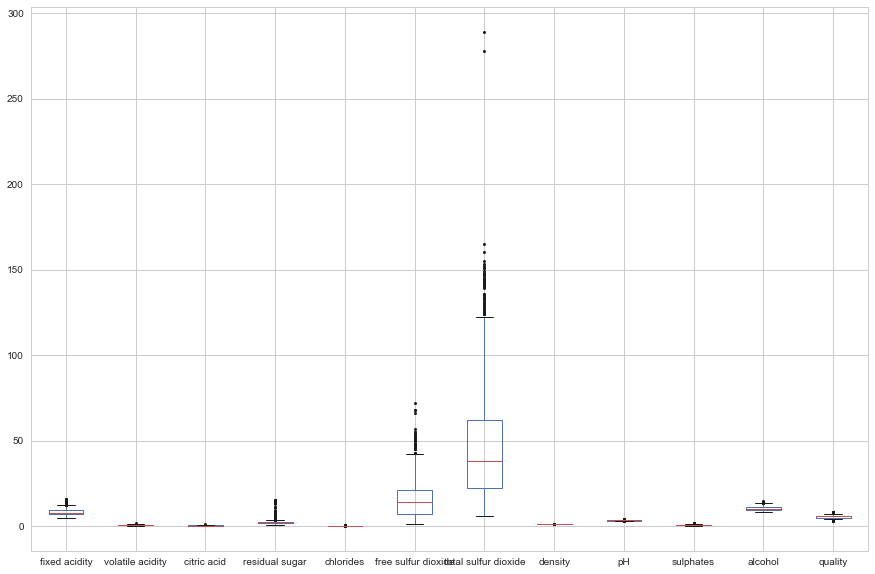

In [285]:
data.plot.box(sym='k.', figsize=(15,10))
plt.show()

<b>Easier to see here the features with outliers. Let's show each individually.</b>

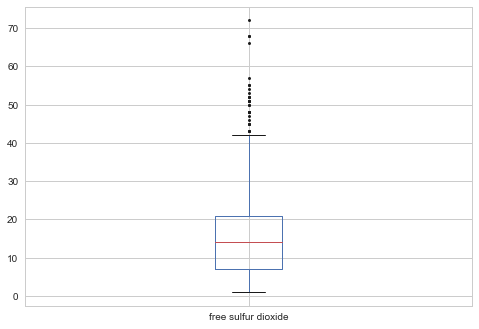

In [286]:
data[['free sulfur dioxide']].plot(kind='box', sym='k.')
plt.show()

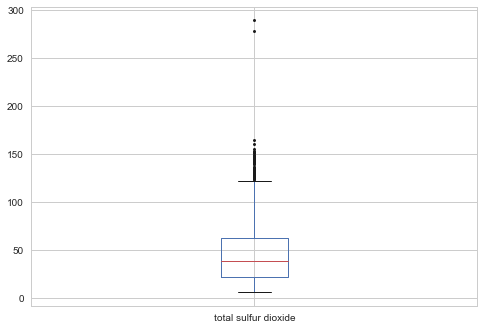

In [287]:
data[['total sulfur dioxide']].plot.box(sym='k.')
plt.show()

<b>A few severe outliers.</b>

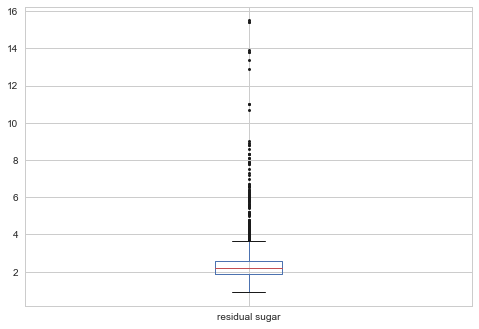

In [288]:
plot = data[['residual sugar']].plot.box(sym='k.')
plt.show()

<b>A few severe outliers.</b>

<b>Overall, suspicion of outliers for the residual sugar and sulfur dioxide seems correct.</b>

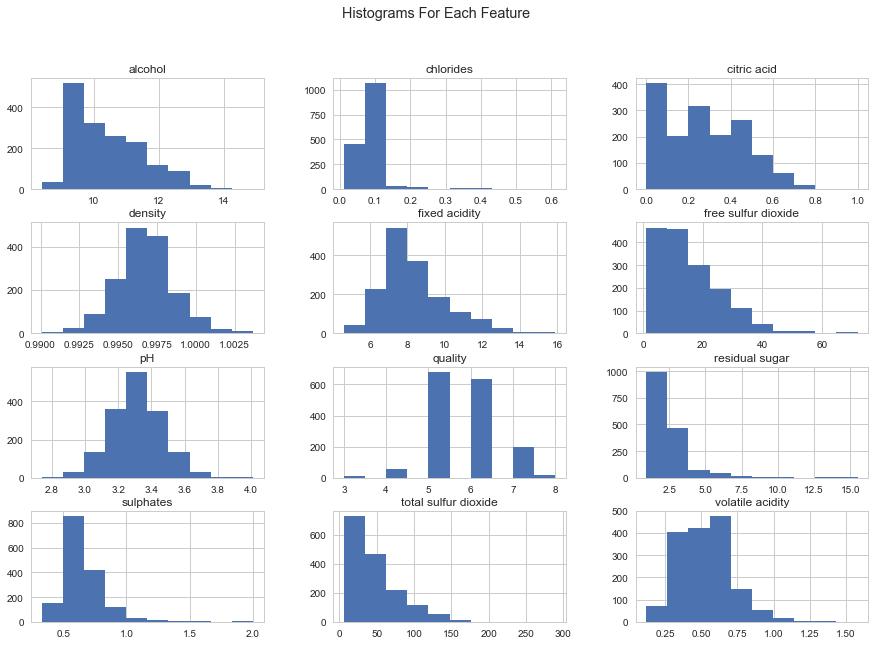

In [289]:
plot = data.hist(figsize=(15,10))
plt.suptitle('Histograms For Each Feature')
plt.show()

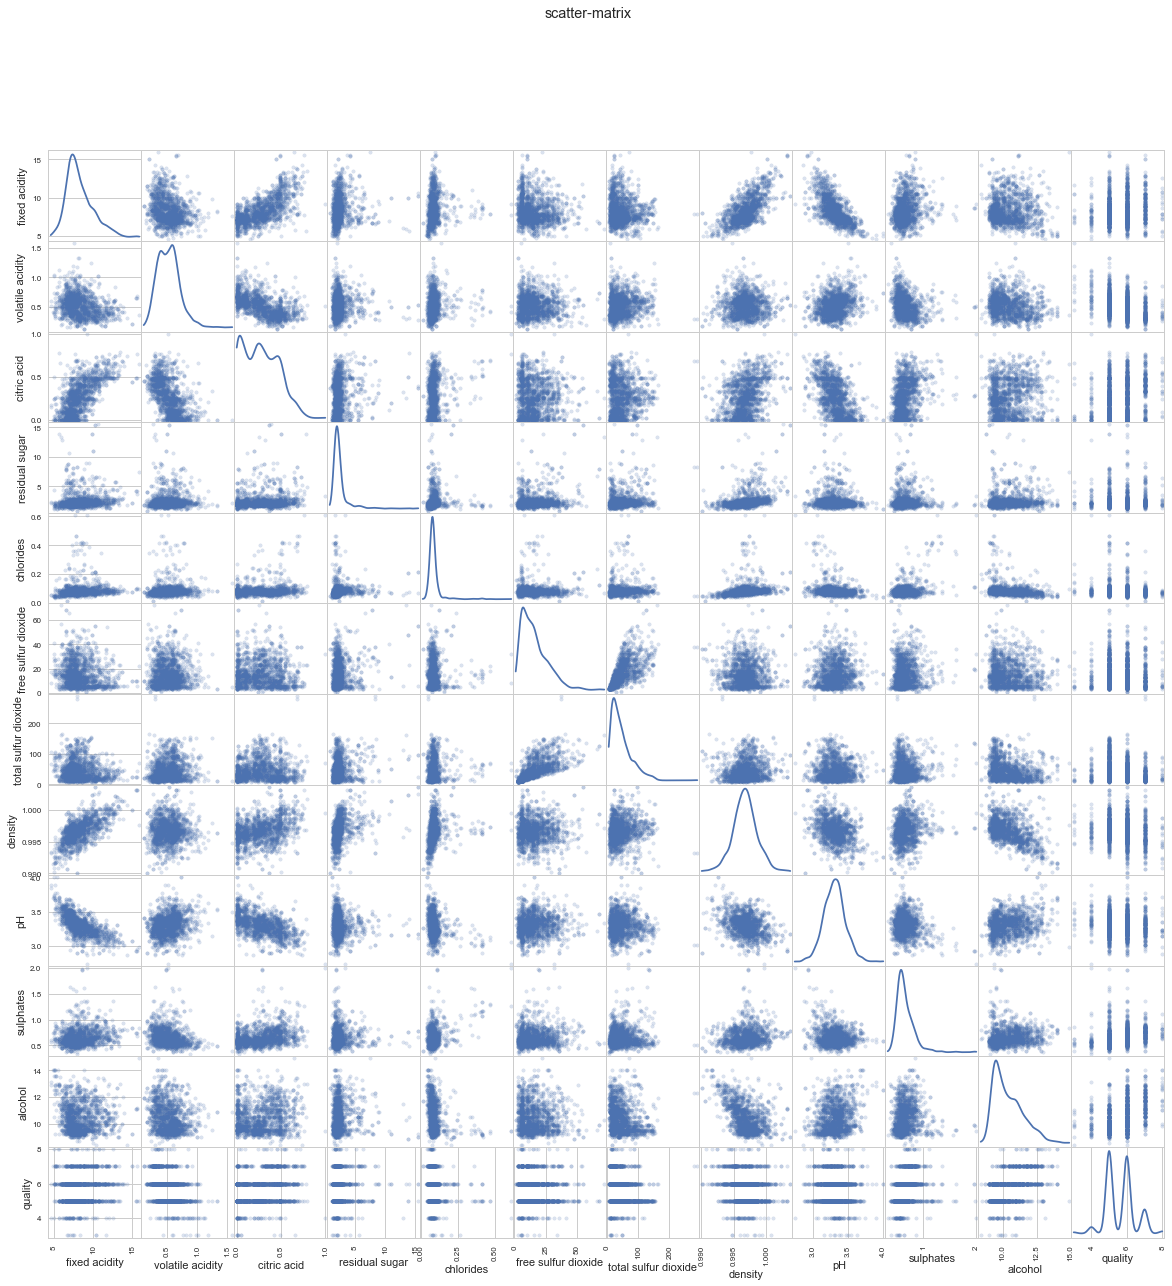

In [290]:
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.suptitle('scatter-matrix')
plt.show()

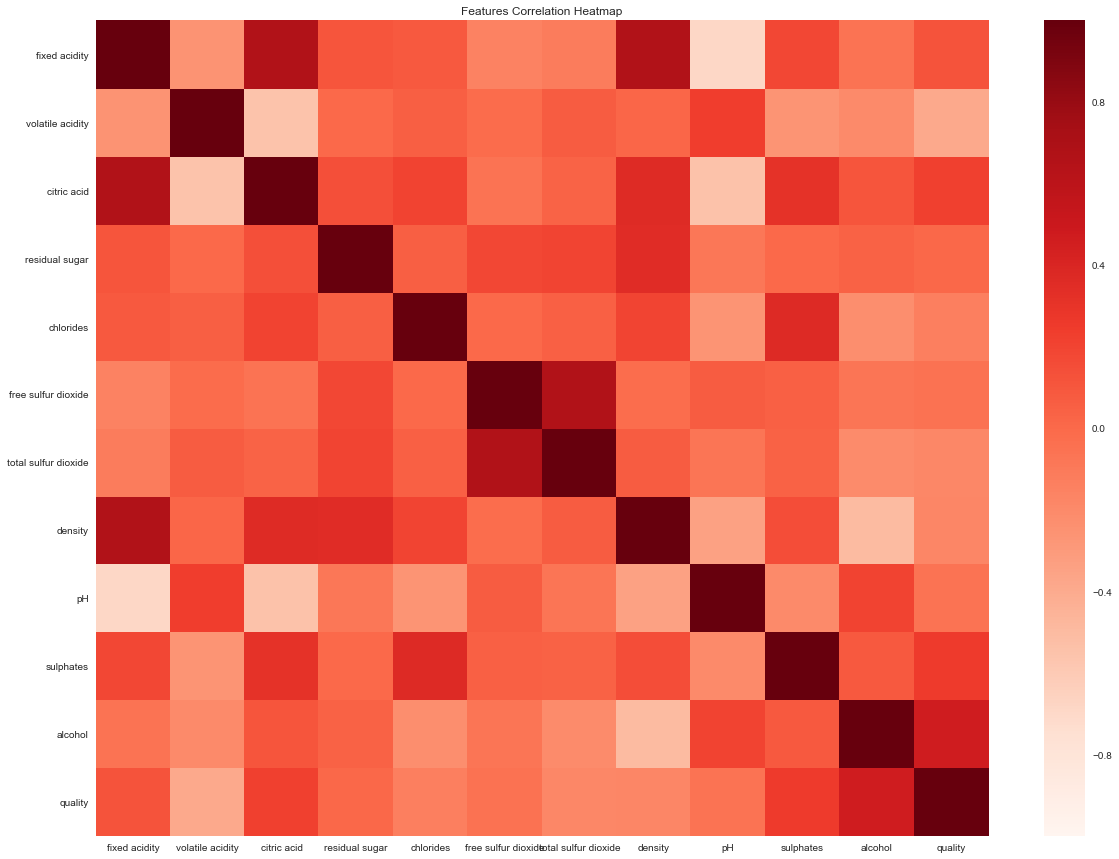

In [291]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Features Correlation Heatmap")
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

In [292]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<b>Seems like there is a correlation between alcohol and quality, which is interesting.</b>

<h2>Quality Groups Analysis</h2>

In [293]:
d = data.groupby('quality_label')
d.describe()

alcohol   chlorides  citric acid     density  \
quality_label                                                          
low           count  744.000000  744.000000   744.000000  744.000000   
              mean     9.926478    0.092989     0.237755    0.997068   
              std      0.758007    0.055781     0.183368    0.001598   
              min      8.400000    0.039000     0.000000    0.992560   
              25%      9.400000    0.074000     0.080000    0.996120   
              50%      9.700000    0.081000     0.220000    0.996935   
              75%     10.300000    0.094000     0.360000    0.997900   
              max     14.900000    0.611000     1.000000    1.003150   
medium        count  837.000000  837.000000   837.000000  837.000000   
              mean    10.828375    0.082967     0.297921    0.996494   
              std      1.088838    0.037561     0.199557    0.002053   
              min      8.400000    0.012000     0.000000    0.990070   
              25%     10.000000    0.067000     0.110000    0.995200   
              50%     10.800000    0.077000     0.310000    0.996420   
              75%     11.600000    0.088000     0.460000    0.997700   
              max     14.000000    0.415000     0.780000    1.003690   
high          count   18.000000   18.000000    18.000000   18.000000   
              mean    12.094444    0.068444     0.391111    0.995212   
              std      1.224011    0.011678     0.199526    0.002378   
              min      9.800000    0.044000     0.030000    0.990800   
              25%     11.325000    0.062000     0.302500    0.994175   
              50%     12.150000    0.070500     0.420000    0.994940   
              75%     12.875000    0.075500     0.530000    0.997200   
              max     14.000000    0.086000     0.720000    0.998800   

                     fixed acidity  free sulfur dioxide          pH  \
quality_label                                                         
low           count     744.000000           744.000000  744.000000   
              mean        8.142204            16.567204    3.311653   
              std         1.572396            10.890291    0.154296   
              min         4.600000             3.000000    2.740000   
              25%         7.100000             8.000000    3.200000   
              50%         7.800000            14.000000    3.310000   
              75%         8.900000            23.000000    3.400000   
              max        15.900000            68.000000    3.900000   
medium        count     837.000000           837.000000  837.000000   
              mean        8.472043            15.315412    3.311577   
              std         1.858269            10.016179    0.153431   
              min         4.700000             1.000000    2.860000   
              25%         7.100000             7.000000    3.210000   
              50%         8.000000            13.000000    3.310000   
              75%         9.600000            21.000000    3.400000   
              max        15.600000            72.000000    4.010000   
high          count      18.000000            18.000000   18.000000   
              mean        8.566667            13.277778    3.267222   
              std         2.119656            11.155613    0.200640   
              min         5.000000             3.000000    2.880000   
              25%         7.250000             6.000000    3.162500   
              50%         8.250000             7.500000    3.230000   
              75%        10.225000            16.500000    3.350000   
              max        12.600000            42.000000    3.720000   

                        quality  residual sugar   sulphates  \
quality_label                                                 
low           count  744.000000      744.000000  744.000000   
              mean     4.901882        2.542070    0.618535   
              std      0.339894        1.393550    0

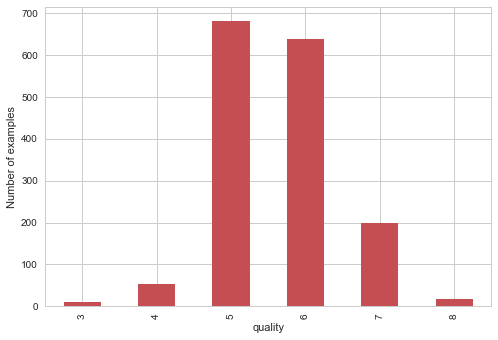

In [294]:
data.groupby('quality').size().plot.bar(color='r')
plt.ylabel("Number of examples")
plt.show()

<b>Seems like we have much less data for quality values other than 5 and 6. Maybe a classification model would work best with 5, 6 and 7 as group boundaries?</b>

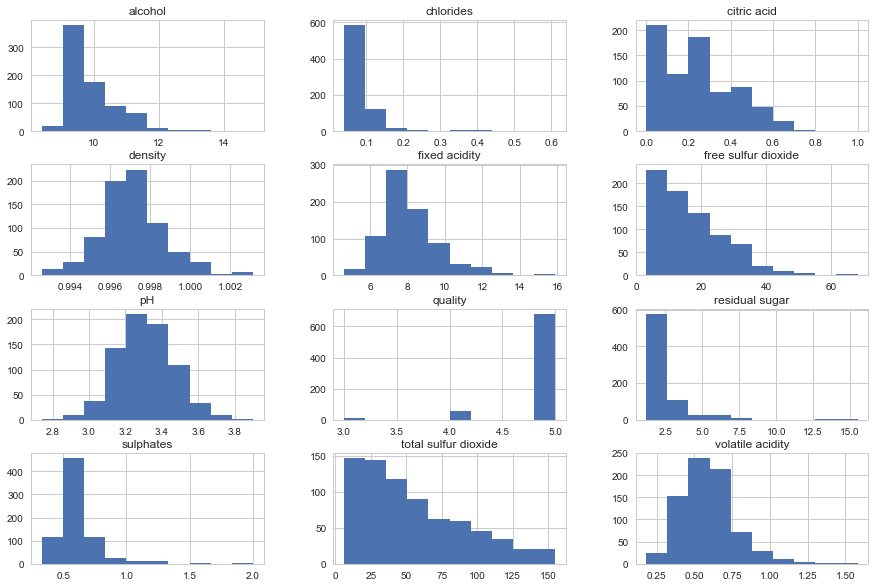

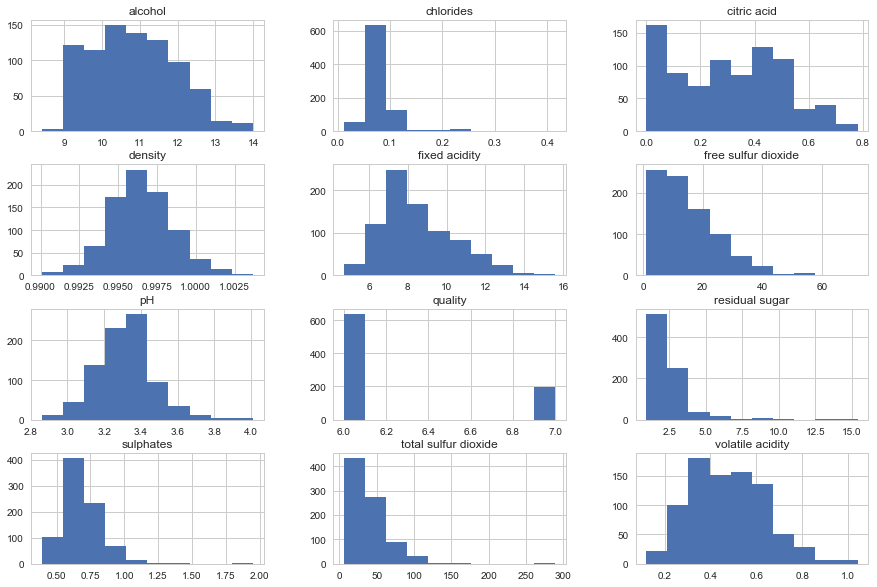

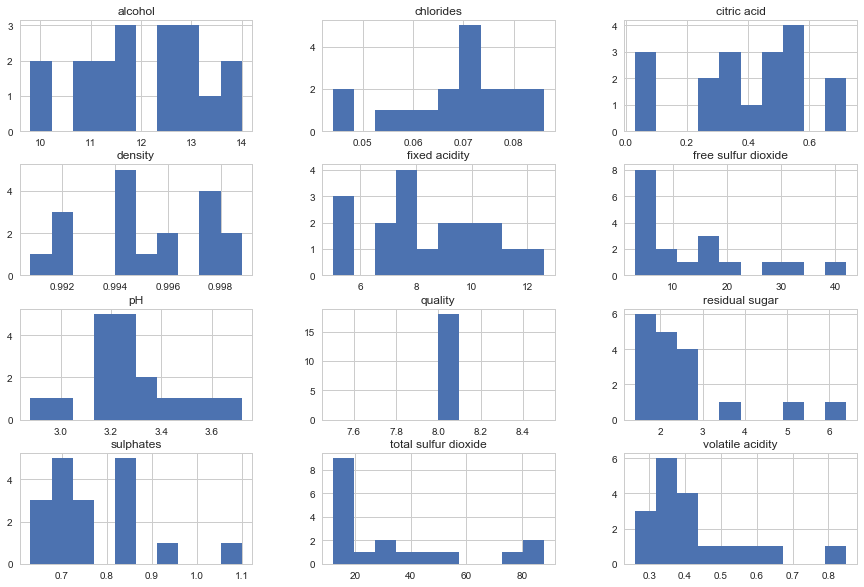

In [295]:
groups = data.groupby('quality_label').hist(figsize=(15,10))
# for group in groups:
#   plt.figure()
#   matplotlib.pyplot.hist(group[1].pH)
#   plt.show()
plt.show()

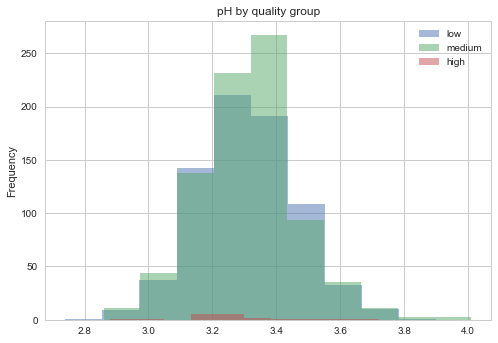

In [296]:
data.groupby('quality_label').pH.plot(kind='hist', title='pH by quality group', alpha=0.5, legend=True)
plt.show()

<b>pH seems to be normally distributed</b>

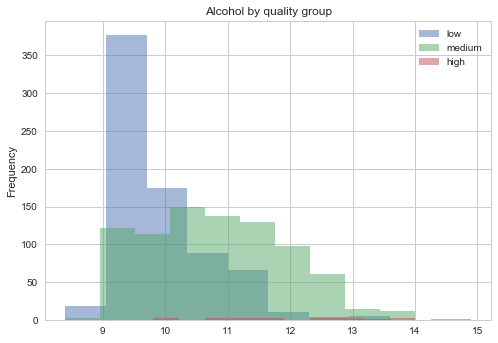

In [297]:
data.groupby('quality_label').alcohol.plot.hist(title='Alcohol by quality group', alpha=0.5, legend=True)
plt.show()

<b>Confirms trend of low quality having low amounts of alcohol.</b>